# Introduction aux outils numériques

Nous allons faire un survol de quelques commandes que nous utiliserons dans les autres TP numériques. 

## Objectifs de cette séance

Comme vous avez tous une formation de base en Matlab, nous allons nous appuyer sur cela pour réaliser quelques opérations simples que nous employerons sur des problèmes d'aérodynamique par la suite. 

Réalisez les exercices avec Matlab et dans ce notebook pour vous familiariser avec les commandes python.

## Modules

Comme Matlab, Python est langage interprété. On s'appuie sur des fonctions pré-compilées pour rendre les opérations de calcul efficace. 

Contrairement à Matlab, les modules ne sont pas chargés automatiquement. Il faut donc toujours importer ce dont on a besoin. Dans le cadre de ce cours, nous aurons besoin essentiellement de `numpy` et `matplotlib`.

[NumPy](https://numpy.org) est une bibliothèque d'objets et de fonctions adaptés au calcul vectoriel c'est-à-dire à des opérations sur des listes ou tableaux (N-dimensions) homogènes de nombres (_array_). Grace à cette bibliothèque, les opérations principales que l'on réalise avec Matlab sont réalisable sous Python. Souvent les fonctions ont le même nom. 

[MatplotLib](https://matplotlib.org/) est une bibliothèque d'objets et de fonctions pour réaliser des représentations graphiques 2D comme dans Matlab (et certainement même plus !). On utilise le sous-module `pyplot` qui contient tout ce dont on a besoin.

Pour charger un module, on utilise la fonction `import` et on lui donne un petit nom pour raccourcir nos appels. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Pour avoir des graphiques de bonne qualité, nous utilisons les paramètres suivants.

In [2]:
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

Voilà vous êtes prêt ! 

## Exercice 1 - Intersection de deux droites

On souhaite calculer le point d'intersection de deux droites définies par les équations suivantes : 
\begin{equation}
y = 2 x -5 \hspace{2cm} \text{et} \hspace{2cm} 
y = -x + 3
\end{equation}

1. Construisez les tableaux suivants : 
  * `x` de 20 points uniformément répartis de -5 à 5. Utilisez la fonction `linspace` de `numpy`.
  * `y1` et `y2` les ordonnées des points aux abscisses `x` des points sur les droites 1 et 2. 

In [3]:
npts = 20
x = np.linspace(-5,5,npts)
y1 = 2*x-5
y2 = -x + 3

2. Tracez les deux droites ainsi définies : 
  * La droite 1 en bleu, la droite 2 en rouge et en pointillés.
  * Affichez une grille, une légende et des labels sur les axes.

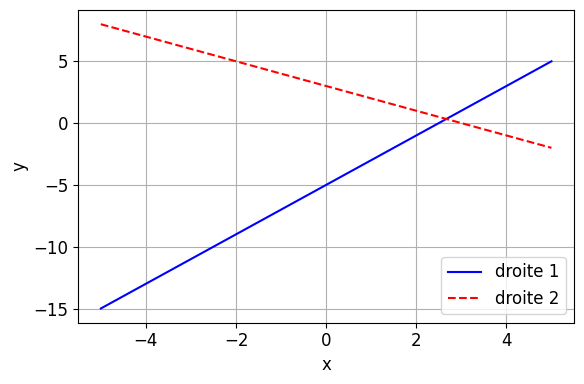

In [4]:
plt.plot(x,y1,label='droite 1',color='blue')
plt.plot(x,y2,label='droite 2',color='red',linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

3. Définissez le problème matriciel $M X = B$ à résoudre pour trouver l'intersection des droites et créez les tableaux numpy `M` et `B`. Utilisez la fonction `array`, vérifiez les formes avec `shape` et utilisez `reshape` pour corriger. 

\begin{equation}
\text{avec : }\hspace{1cm} M = \begin{pmatrix}
-2 & 1 \\
1 & 1 
\end{pmatrix}
\hspace{1cm}  B = \begin{pmatrix}
-5 \\
3 
\end{pmatrix} \hspace{1cm}  X = \begin{pmatrix}
x \\
y \end{pmatrix}
\end{equation}

In [5]:
M = np.array(((-2,1),(1,1)))
B = np.array((-5,3)).reshape((2,1))

4. Résolvez le problème en utilisant le sous-module d'algèbre linéaire [`linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html#solving-equations-and-inverting-matrices) de `numpy`. Le produit matriciel (`dot`) est implémenté avec le symbole `@`

In [6]:
Minv = np.linalg.inv(M)
Xint = Minv @ B

In [7]:
Xint2 = np.linalg.solve(M,B)

5. Reprennez la figure de la question 2 et ajoutez le point d'intersection avec un symbole vert. Si l'intersection n'est pas correcte, vérifiez vos matrices et leurs formes. Enregistrez la figure sous un format image. 

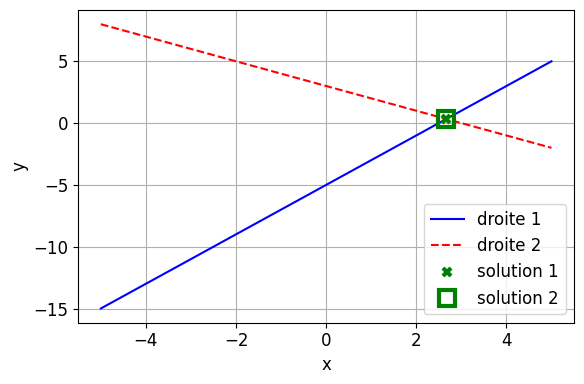

In [8]:
plt.plot(x,y1,label='droite 1',color='blue')
plt.plot(x,y2,label='droite 2',color='red',linestyle='--')
plt.plot(Xint[0],Xint[1],marker='x',color='green',markeredgewidth=3.0, 
         label="solution 1",linestyle = 'None')
plt.plot(Xint2[0],Xint2[1],marker='s',color='green',ms=12,markeredgewidth=3.0,
         markerfacecolor = 'None', label="solution 2",linestyle = 'None')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.savefig('exercice1.png')
plt.show()

## Exercice 2 - Les profils NACA 4 chiffres

Les profils NACA sont des formes d'aile testées par le [National Advisory Committee for Aeronautics](https://fr.wikipedia.org/wiki/National_Advisory_Committee_for_Aeronautics). C'est des profils dont la forme correspond à une équation mathématique dont les formes sont paramétrées et dont les coefficients aérodynamiques en fonction de l'incidence (angle d'attaque) ont été mesurés de manière systématique en soufflerie. 

Ici on s'intéressera aux profils dits 4 chiffres symmétrique `NACA00XX`. Il sont définis par 2 paramètres : 
  * La corde du profil $c$ (distance bord d'attaque/bord de fuite).
  * L'épaisseur maximale du profil est caractérisée par le paramètre $t$ qui est un pourcentage de la corde : 
\begin{equation}
t = \frac{\texttt{XX}}{100}
\end{equation}

On définit la coordoonnée $x_c$ qui varie de 0 à 1 le long de la corde. La demi-épaisseur du profil $y_t$ (distance entre ses deux côtés) est alors paramétrée en fonction de cette coordonnée par l'équation suivante : 
\begin{equation}
y_t = 5 t \left( 0.2969 \sqrt{x_c} - 0.1260 \,  x_c - 0.3516 \, x_c^2 + 0.2843 \, x_c^3 - 0.1036 \, x_c^4\right)
\end{equation}

Ainsi un profil dont la forme pourra être obtenue grace au deux courbes (redimmensionnées): 

\begin{align}
x_{up} &= x_c \, c   & et \hspace{1cm}  y_{up} &= + y_t \, c \\
x_{down} &= x_c \, c  & et \hspace{1cm}  y_{down} &= - y_t \, c 
\end{align}

Pour les questions suivantes, n'hésitez pas à contacter l'enseignant. Les questions sont choisies pour vous faire réfléchir et découvrir des options des modules.

1. Construisez et tracez le profil NACA007 de corde 12 cm avec 15 points de chaque côté. Déterminez l'épaisseur maximum obtenue la position sur la corde où ce point est atteint. Que pouvez vous dire ?

In [9]:
# Parametres du profil
corde = 0.12
t = 7/100

# Parametre de discretisation
npts = 15


In [10]:
# Coordonnee de corde
xc = np.linspace(0,1,npts)

# Epaisseur
yt = 5*t * (  0.2969 * xc**0.5 - 0.1260 * xc - 0.3516 * xc**2 
            + 0.2843 * xc**3 - 0.1036 * xc**4 )

In [11]:
# Redimensionnement 
x = xc * corde
# Extrados
yu = yt * corde
# Intrados
yd = - yt * corde

In [12]:
e_max = (yu.max() - yd.min())/corde
id_max = yu.argmax()
x_emax = xc[id_max] * corde
print(f'Epaisseur maximum: {e_max:.5f} m')
print(f'Position: {x_emax:.5f} m')

Epaisseur maximum: 0.06996 m
Position: 0.03429 m


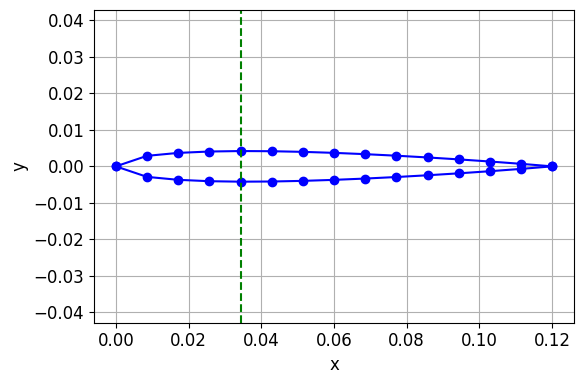

In [13]:
plt.plot(x,yu,color='blue',marker='o')
plt.plot(x,yd,color='blue',marker='o')
plt.axvline(x_emax, color = 'green' , linestyle = '--')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

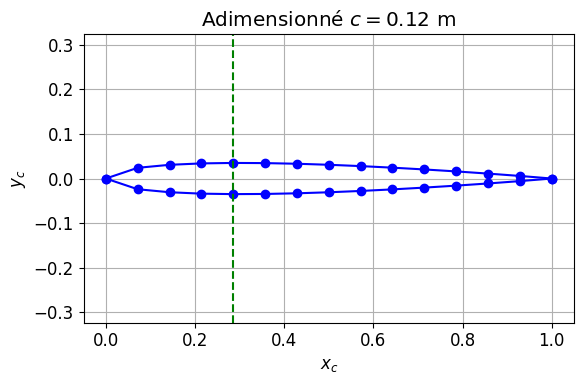

In [14]:
plt.plot(x/corde,yu/corde,color='blue',marker='o')
plt.plot(x/corde,yd/corde,color='blue',marker='o')
plt.axvline(x_emax/corde, color = 'green' , linestyle = '--')
plt.axis('equal')
plt.xlabel(r'$x_c$')
plt.ylabel(r'$y_c$')
plt.grid()
plt.title(r'Adimensionné $c=0.12$ m')
plt.show()

2. Créez une fonction qui permette d'obtenir les coordonnées dimensionnées à partir des paramètres du profil. Vous pourrez utiliser un distionnaire pour retourner les tableaux nécessaires. Tracez sur une même graphique les profils `NACA0005`, `NACA0012` et `NACA0017` de corde 10 cm, 5 cm et 7.5 cm respectivement. 

In [15]:
def NACA00_shape(chiffres34,corde,npts=15):
    t = chiffres34/100
    
    # Coordonnee de corde
    xc = np.linspace(0,1,npts)

    # Epaisseur
    yt = 5*t * (  0.2969 * xc**0.5 - 0.1260 * xc - 0.3516 * xc**2 
                + 0.2843 * xc**3 - 0.1036 * xc**4 )
    
    # Redimensionnement 
    x = xc * corde
    # Extrados
    yu = yt * corde
    # Intrados
    yd = - yt * corde
    
    return {'x':x,'yu':yu,'yd':yd}

In [16]:
naca0005 = NACA00_shape(5,0.1)
naca0012 = NACA00_shape(5,0.05)
naca0017 = NACA00_shape(5,0.075)

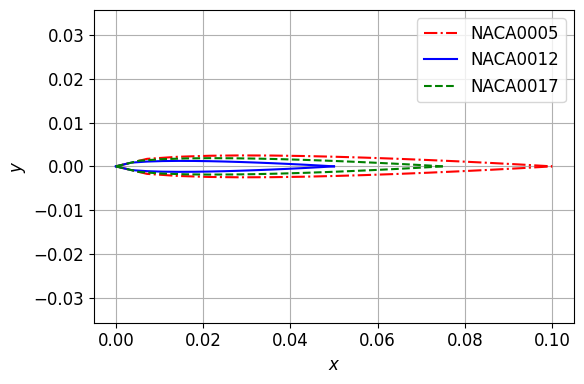

In [17]:
plt.plot(naca0005['x'],naca0005['yu'],color='red',linestyle='-.',
         label='NACA0005')
plt.plot(naca0005['x'],naca0005['yd'],color='red',linestyle='-.')
plt.plot(naca0012['x'],naca0012['yu'],color='blue',linestyle='-',
         label='NACA0012')
plt.plot(naca0012['x'],naca0012['yd'],color='blue',linestyle='-')
plt.plot(naca0017['x'],naca0017['yu'],color='green',linestyle='--',
         label='NACA0017')
plt.plot(naca0017['x'],naca0017['yd'],color='green',linestyle='--')
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.legend()
plt.show()

3. Que peut-on faire pour rendre les tracés pour lisse ? Réalisez un zoom sur les 5 premiers millimètres de corde et commentez.

In [18]:
naca0005 = NACA00_shape(5,0.1,npts=200)
naca0012 = NACA00_shape(5,0.05,npts=200)
naca0017 = NACA00_shape(5,0.075,npts=200)

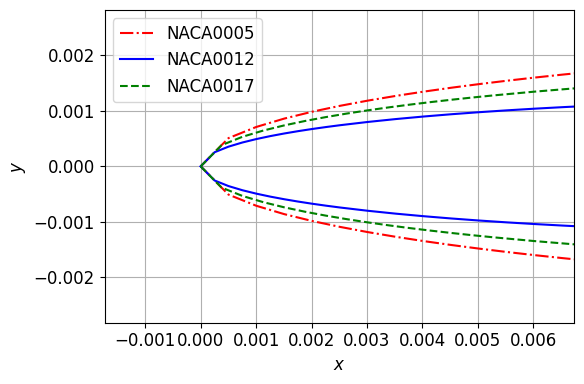

In [19]:
plt.plot(naca0005['x'],naca0005['yu'],color='red',linestyle='-.',
         label='NACA0005')
plt.plot(naca0005['x'],naca0005['yd'],color='red',linestyle='-.')
plt.plot(naca0012['x'],naca0012['yu'],color='blue',linestyle='-',
         label='NACA0012')
plt.plot(naca0012['x'],naca0012['yd'],color='blue',linestyle='-')
plt.plot(naca0017['x'],naca0017['yu'],color='green',linestyle='--',
         label='NACA0017')
plt.plot(naca0017['x'],naca0017['yd'],color='green',linestyle='--')
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.legend()
plt.xlim(0.,0.005)
plt.show()

4. La forme du bord d'attaque et du bord de fuite ont un rôle crucial sur la portance d'un profil aérodynamique. Il est parfois utile d'utiliser une distribution de points non uniforme pour calculer les efforts aérodynamiques. 
Reprennez la fonction de la question 2 et ajoutez une option pour avoir une distribution cosinusoidale selon : 
\begin{align}
x_c = \frac{1}{2}\left(1 - \cos{\zeta}\right) \hspace{1cm} \text{avec : } \hspace{0.2cm} \zeta \in [0, \pi]
\end{align}

In [20]:
def NACA00_shape_improved(chiffres34,corde,npts=15,distri='cos'):
    t = chiffres34/100
    
    # Coordonnee de corde
    if distri=='uni':
        xc = np.linspace(0,1,npts)
    elif distri=='cos':
        zeta = np.linspace(0,np.pi,npts)
        xc = 0.5 * (1 - np.cos(zeta))

    # Epaisseur
    yt = 5*t * ( 0.2969 * xc**0.5 - 0.1260 * xc - 0.3516 * xc**2 
                + 0.2843 * xc**3 - 0.1036 * xc**4 )
    
    # Redimensionnement 
    x = xc * corde
    # Extrados
    yu = yt * corde
    # Intrados
    yd = - yt * corde
    
    return {'x':x,'yu':yu,'yd':yd}

5. Pour les 3 mêmes profils de la question 2, avec une discretisation cosinusoidale de 41 points, réalisez un zoom sur les 5 premiers millimètres de corde et comparez à la distribution uniforme avec le même nombre de points. Exportez la figure en image. 

In [21]:
naca0005_uni = NACA00_shape_improved(5,0.1,npts=41,distri='uni')
naca0012_uni = NACA00_shape_improved(5,0.05,npts=41,distri='uni')
naca0017_uni = NACA00_shape_improved(5,0.075,npts=41,distri='uni')

naca0005_cos = NACA00_shape_improved(5,0.1,npts=41)
naca0012_cos = NACA00_shape_improved(5,0.05,npts=41)
naca0017_cos = NACA00_shape_improved(5,0.075,npts=41)

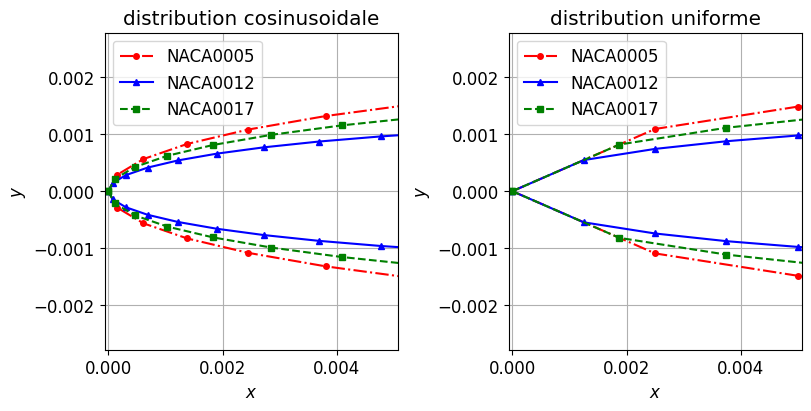

In [22]:
fig, ax = plt.subplots(1,2,constrained_layout=True,tight_layout=False,figsize=(8,4))

ax[0].plot(naca0005_cos['x'],naca0005_cos['yu'],marker='o',ms=4,
           color='red',linestyle='-.',label='NACA0005')
ax[0].plot(naca0005_cos['x'],naca0005_cos['yd'],marker='o',ms=4,
           color='red',linestyle='-.')
ax[0].plot(naca0012_cos['x'],naca0012_cos['yu'],marker='^',ms=4,
           color='blue',linestyle='-',label='NACA0012')
ax[0].plot(naca0012_cos['x'],naca0012_cos['yd'],marker='^',ms=4,
           color='blue',linestyle='-')
ax[0].plot(naca0017_cos['x'],naca0017_cos['yu'],marker='s',ms=4,
           color='green',linestyle='--',label='NACA0017')
ax[0].plot(naca0017_cos['x'],naca0017_cos['yd'],marker='s',ms=4,
           color='green',linestyle='--')
ax[0].axis('equal')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].grid()
ax[0].legend()
ax[0].set_xlim(0.,0.005)
ax[0].set_title('distribution cosinusoidale')
ax[1].plot(naca0005_uni['x'],naca0005_uni['yu'],marker='o',ms=4,
           color='red',linestyle='-.',label='NACA0005')
ax[1].plot(naca0005_uni['x'],naca0005_uni['yd'],marker='o',ms=4,
           color='red',linestyle='-.')
ax[1].plot(naca0012_uni['x'],naca0012_uni['yu'],marker='^',ms=4,
           color='blue',linestyle='-',label='NACA0012')
ax[1].plot(naca0012_uni['x'],naca0012_uni['yd'],marker='^',ms=4,
           color='blue',linestyle='-')
ax[1].plot(naca0017_uni['x'],naca0017_uni['yu'],marker='s',ms=4,
           color='green',linestyle='--',label='NACA0017')
ax[1].plot(naca0017_uni['x'],naca0017_uni['yd'],marker='s',ms=4,
           color='green',linestyle='--')
ax[1].axis('equal')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].grid()
ax[1].legend()
ax[1].set_xlim(0.,0.005)
ax[1].set_title('distribution uniforme')

plt.savefig('exercice2.png')
plt.show()